# Advanced Data Visualization

<br>
In this class, we shall look into more advanced plots available for visualizing continuous (or numeric)  data and discrete (or categorical) data. To recall, let's see what is continuous and discrete data.

* __Continuous data__:
Can occupy any value over a continuous range and are always essentially numeric.
* __Discrete data__:
Can only take distinct values. Discrete data can be numeric -- like numbers of apples -- but it can also be categorical -- like red or blue, or male or female, or good or bad.

### 1. Plots for continuous data

We have already seen about scatter plots and distribution plots in the previous class. These are basic plots used to visualize continuous data. There are several other plots for continuous data. Lets see them one by one.

### 1.1 _Pair Plot_

Seaborn's pairplot is more like a scatter plot, but it is used to show multiple relationships between different pairings of the variables in a dataset. It shows the relationship between all numeric values in a dataset, all non-numeric values are automatically ignored.

Let's create a pairplot to visualize the variability of all numeric fields in the 'iris' dataset.

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


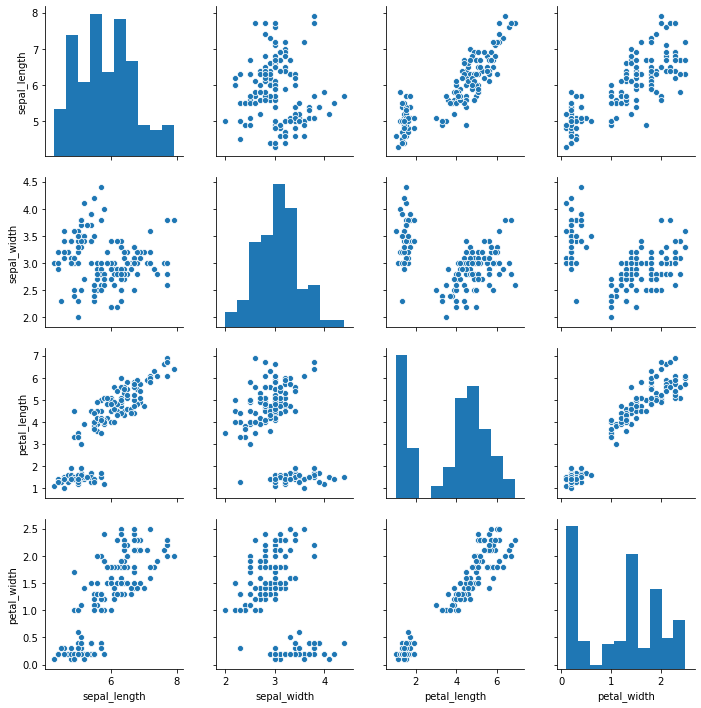

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

iris = sns.load_dataset('iris')
print(iris.head())
sns.pairplot(iris)

## Exercise:

Import seaborn's inbuilt dataset tips into variable named 'tips' and analyze the relationship between all numerical data using a pairplot().

In [2]:
# write your code below


### Solution

```python
tips = sns.load_dataset('tips')

sns.pairplot(tips)
```

### 1.2 _Grid Plot_

GridPlots are general types of plots that allow you to map different types of plot to rows and columns of a grid, this helps you create similar plots separated by features. They are more like pairplot but with increased controllability. GridPlot is created using the PairGrid() function.

Let's create a grid plot for 'iris' dataset and understand what this means.

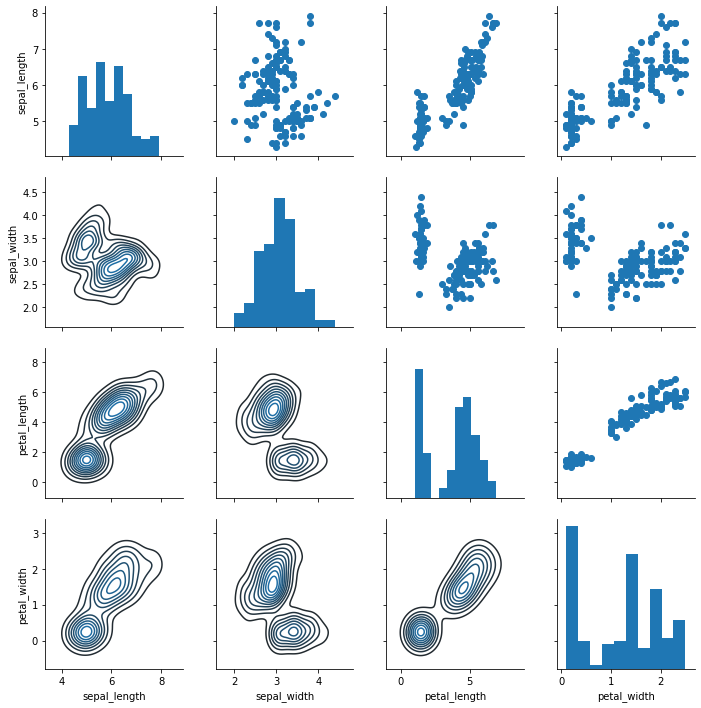

In [3]:
g = sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

### 1.3 _KDE Plot_

KDE plots are Kernel Density Estimation Plots. It is a lot like a histogram, but gives the probability distribution. This means that instead of plotting actual values it estimates the probability density of a continuous variable.

Let's create a KDE plot to see the probability distribution of 'tip' in tips dataset.

Text(0.5, 1.0, 'Probability density plot of Tip Amount')

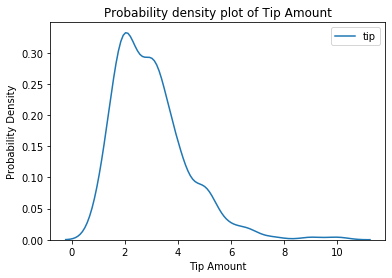

In [4]:
sns.kdeplot(tips['tip'])
plt.xlabel('Tip Amount')
plt.ylabel('Probability Density')
plt.title('Probability density plot of Tip Amount')

## Exercise:

Visualize the probability distribution of 'total_bill' in tips dataset using a kdeplot(). Label X and Y axis as 'Total Bill' and 'Probability Density' respectively and title as 'Probability density plot of Total Bill'

In [5]:
#write your code below


### Solution

```python
sns.kdeplot(tips['total_bill'])
plt.xlabel('Total Bill')
plt.ylabel('Probability Density')
plt.title('Probability density plot of Total Bill')
```

### 1.4 _regplot and lmplot_

Seaborn has many built-in capabilities for regression plots. These regression plots are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analyses. 

Let's see what a regplot() can do to our tips dataset.

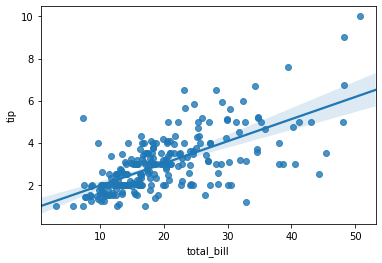

In [6]:
sns.regplot(x="total_bill", y="tip", data=tips)

The solid line in the plot is the linear regression model fit. The translucent band lines, however, describe a bootstrap confidence interval generated for the estimate.

An lmplot() is used in the same way as regplot() and it does the same fitting. The main difference between them is that regplot() is an axes-level function, so it draws directly onto an axes, while lmplot() is a figure-level function and creates its own figure. This means that regplot() can coexist in a figure with other kinds of plots while lmplot() needs to occupy an entire figure.


## Exercise:

Use lmplot() to show the regression between 'petal_length' and 'petal_width'.

In [7]:
#Write your code below


### Solution

```python
sns.lmplot(x="petal_length", y="petal_width", data=iris)
```

### 2. Plots for categorical data

It’s useful to divide seaborn’s categorical plots into three groups:

* stripplot() and swarmplot()
* boxplot() and violinplot()
* barplot() and pointplot()

### 2.1 _stripplot() and  swarmplot()_

A __stripplot()__ will draw a scatterplot where one variable is categorical. It shows the distribution of a numerical data across a category.

Let's say we want to visualize the distribution of 'total_bill' across each 'day' in tips dataset, then we can use a stripplot().

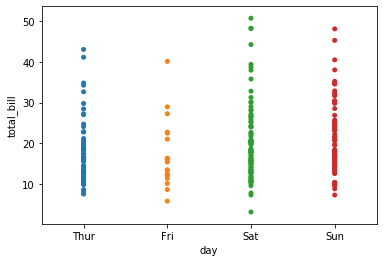

In [8]:
sns.stripplot(x="day", y="total_bill", jitter=False, data=tips)

Inorder to avoid overlapping of values, we can use 'jitter=True'. Also, we can visualize a second categorical variable by making it as the 'hue'.

## Exercise:

Use a stripplot() to show the variation of 'tip' w.r.t 'day' and 'time' categories utilizing 'jitter=True'

In [9]:
#write your code below


### Solution

```python
sns.stripplot(x="day", y="tip", hue='time', jitter=True, data=tips)
# Because in the newer version of Seaborn library, jitter is set to True by default. We can simply remove the 'jitter=True':
sns.stripplot(x="day", y="tip", hue='time', data=tips)
```

A __swarmplot()__ is similar to stripplot(), but the points are adjusted (only along the categorical axis) automatically so that they don’t overlap. This gives a better representation of the distribution of values.

Let's create a swarmplot() for the same data as above.

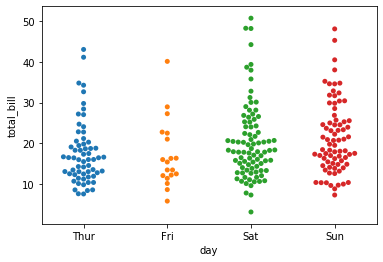

In [10]:
sns.swarmplot(x="day", y="total_bill", data=tips)

## Exercise:

For the 'iris' dataset, use a swarmplot() to show the variation of 'sepal_width' w.r.t 'species' categories.

In [11]:
iris = sns.load_dataset('iris')
#write your code below


### Solution

```python
sns.swarmplot(x="species", y="sepal_width", data=iris)
```

### 2.2 _boxplot() and  violinplot()_

A __boxplot()__ is used to show the distribution of data within categories.

For example, it can be used to visualize the distribution of 'total_bill' for each 'day' and for each 'time' within each 'day'.

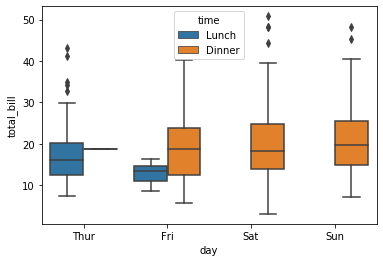

In [12]:
sns.boxplot(x="day", y="total_bill", hue="time", data=tips);

A better visualization is the __viloinplot()__. It gives the categories and also the Kernel Density Curve of other numerical variable within each category.

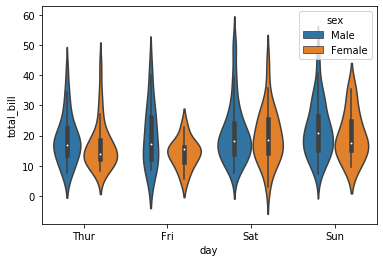

In [13]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips);

## Exercise

Use a violinplot() to visualize the 'tip' given per 'time' of day and categorize by 'smoker' or non-smoker.

In [14]:
#write your code below


### Solution

```python
sns.violinplot(x="time", y="tip", hue="smoker", data=tips);
```